________________________________________________________________________________________
# Assignment  1 - DS 211
##Hassan Riaz  
*2021223*  
________________________________________________________________________________________



Google drive connection

In [1]:
from google.colab import drive
drive.mount("/content/gdrives")

Mounted at /content/gdrives


In [2]:
# libraries import
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [50]:
# Traffic Accident dataset Dataframe - while creating the dataframe i was getting an encoding error which was later fixed with help of stack overflow answers
ta_df = pd.read_csv('/content/gdrives/MyDrive/Datasets/Pakistani_Traffic_Accidents.csv', encoding = 'unicode_escape', engine ='python')

# Petrol Gas Prices Worldwide dataset Dataframe
pgp_df = pd.read_csv('/content/gdrives/MyDrive/Datasets/Petrol_Gas_Prices_Worldwide.csv', encoding = 'unicode_escape', engine ='python')

In [4]:
# view first five rows of traffic accident dataframe
ta_df.head()

,*- Islamabad Included.,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Year,Total number of accidents,Fatal Accidents,Non-Fatal Accidents,Killed,Injured,Total number of vehicles involved
2,Pakistan,2008-09,9496,4145,5351,4907,11037,10322
3,Pakistan,2009-10,9747,4378,5369,5280,11173,10496
4,Pakistan,2010-11,9723,4280,5443,5271,11383,10822


In [64]:
# view first five rows of petrol gas prices dataframe
pgp_df.head()

,S#,Country,Daily Oil Consumption (Barrels),World Share,Yearly Gallons Per Capita,Price Per Gallon (USD),Price Per Liter (USD),Price Per Liter (PKR),GDP Per Capita ( USD ),Gallons GDP Per Capita Can Buy,xTimes Yearly Gallons Per Capita Buy
0,1,United States,"19,687,287",20%,934.3,5.19,1.37,289.97,"63,414","12,218",13
1,2,China,"12,791,553",13%,138.7,5.42,1.43,302.87,"10,435","1,925",14
2,3,India,"4,443,000",5%,51.4,5.05,1.33,281.93,"1,901",376,7
3,4,Japan,"4,012,877",4%,481.5,4.69,1.24,262.05,"40,193","8,570",18
4,5,Russia,"3,631,287",4%,383.2,3.41,0.90,190.56,"10,127","2,970",8


________________________________________________________________________________________
# Question No.1  - Traffic Accident Dataset
________________________________________________________________________________________

Don't run this cell twice!

In [6]:
# First we need to clean this data as columns are defined in second row
ta_df = ta_df.set_axis(ta_df.iloc[1], axis=1)

# after second row is set as column we drop first and second row with "NaN" values and column values respectively
ta_df = ta_df.drop(index=[0, 1])

# setting first column as "Province" into new dataframe 
ta_df_p = ta_df.rename(columns = { ta_df.columns[0] : 'Province' })

In [7]:
ta_df_p.head()

1,Province,Year,Total number of accidents,Fatal Accidents,Non-Fatal Accidents,Killed,Injured,Total number of vehicles involved
2,Pakistan,2008-09,9496,4145,5351,4907,11037,10322
3,Pakistan,2009-10,9747,4378,5369,5280,11173,10496
4,Pakistan,2010-11,9723,4280,5443,5271,11383,10822
5,Pakistan,2011-12,9140,3966,5174,4758,10145,9986
6,Pakistan,2012-13 *,8988,3884,5104,4719,9710,9876


________________________________________________________________________________________
1. In which province the most accidents have occured
________________________________________________________________________________________
As the output shows highest accidents province is **Punjab** (This output is without the max() query)

 ![from my github repo](https://raw.githubusercontent.com/hassandsriaz/DS-211-Assignments/main/images/1.png )




In [ ]:
# converting 'Total number of accidents' column datatype into integer to find sum 
ta_df_p['Total number of accidents'] = ta_df_p['Total number of accidents'].astype(int)

# Group by province and sum the total number of accidents and dropping pakistan as it is'nt a province
grouped = ta_df_p.groupby('Province')['Total number of accidents'].sum().sort_values().drop('Pakistan')

# Get the province with the highest value
province = grouped.idxmax()

# Get the highest value
highest_value = grouped.max()

print("Province with highest accidents:", province)
print("No. of accidents:", highest_value)

Province with highest accidents: Punjab
No. of accidents: 49354


________________________________________________________________________________________
2. In which province the least accidents have occured
________________________________________________________________________________________
As the output shows least accidents province is **Islamabad**  
![ from my github repo ](https://raw.githubusercontent.com/hassandsriaz/DS-211-Assignments/main/images/q1_22.png)

In [ ]:
# Get the province with the least value
province = grouped.idxmin()

# Get the minimum value
least_value = grouped.min()

print("Province with least accidents:", province)
print("No. of accidents:", least_value)

________________________________________________________________________________________
3. In which province most people were killed?  
________________________________________________________________________________________
As the output shows highest deaths province is **Punjab**  
![ from my github repo ](https://raw.githubusercontent.com/hassandsriaz/DS-211-Assignments/main/images/q12.png)


In [ ]:
# converting 'Killed' column datatype into integer to find sum 
ta_df_p['Killed'] = ta_df_p['Killed'].astype(int)

# Group by province and sum the total number of deaths and dropping pakistan as it is'nt a province
grouped = ta_df_p.groupby('Province')['Killed'].sum().sort_values().drop('Pakistan')

# Get the province with the highest value
province = grouped.idxmax()

# Get the highest value
highest_value = grouped.max()

print("Province with highest Deaths:", province)
print("No. of Deaths:", highest_value)


________________________________________________________________________________________
4. In which province least people were killed?
________________________________________________________________________________________
As the output shows least deaths province is **Islamabad** 

![from my github repo](https://raw.githubusercontent.com/hassandsriaz/DS-211-Assignments/main/images/q1_4.png)

In [ ]:
# Get the province with the least value
province = grouped.idxmin()

# Get the lowest value
highest_value = grouped.min()

print("Province with least Deaths:", province)
print("No. of Deaths:", highest_value)


________________________________________________________________________________________
5. In which province most people were injured?
________________________________________________________________________________________
As the output shows most injuries province is **Punjab**   
![from my github repo](https://raw.githubusercontent.com/hassandsriaz/DS-211-Assignments/main/images/q1_5.png)


In [ ]:
# converting 'Injured' column datatype into integer to find sum 
ta_df_p['Injured'] = ta_df_p['Injured'].astype(int)

# Group by province and sum the total number of Injuries and dropping pakistan as it is'nt a province
grouped_i = ta_df_p.groupby('Province')['Injured'].sum().sort_values().drop('Pakistan')

# Get the province with the highest value
province = grouped_i.idxmax()

# Get the highest value
highest_value = grouped_i.max()

print("Province with highest Injuries:", province)
print("No. of Injuries:", highest_value)

Province with highest Injuries: Punjab
No. of Injuries: 57103


________________________________________________________________________________________
6. In which province least people were injured?
________________________________________________________________________________________
As the output shows least injuries province is **Islamabad**   
![from my github repo](https://raw.githubusercontent.com/hassandsriaz/DS-211-Assignments/main/images/q1_6.png)


In [ ]:
# Get the province with the least value
province = grouped_i.idxmin()

# Get the lowest value
highest_value = grouped_i.min()

print("Province with least Injuries:", province)
print("No. of Injuries:", highest_value)

________________________________________________________________________________________
7. In which year most accident has occurred?  
________________________________________________________________________________________
As the output shows most accidents were occured in year **2017**

![from my github repo](https://raw.githubusercontent.com/hassandsriaz/DS-211-Assignments/main/images/q1_7.png)

In [ ]:
# datatype from object to integer
ta_df_p['Total number of accidents'] = ta_df_p['Total number of accidents'].astype(int)

#mask with true values against all 'Pakistan' values in province column
mask = ta_df_p['Province'] == 'Pakistan'

#datafame of mask
pak_only_df = ta_df_p[mask]

#group by year
year_group = pak_only_df.groupby('Year')['Total number of accidents'].sum()

#returns index of highest value
year = year_group.idxmax()

#returns max value
accidents = year_group.max()

print("The year with highest accidents: " + year)
print("No. of accidents in " + year + " : " , accidents)


________________________________________________________________________________________
8. In which year least accident has occurred?
________________________________________________________________________________________
As the output shows most least were occured in year **2014**

![from my github repo](https://raw.githubusercontent.com/hassandsriaz/DS-211-Assignments/main/images/q1_8.png)

In [ ]:
#returns index of lowest value
year = year_group.idxmin()

#returns minimum value
accidents = year_group.min()

print("The year with lowest accidents: " + year)
print("No. of accidents in " + year + " : " , accidents)

The year with lowest accidents: 2014-15*
No. of accidents in 2014-15* :  7865


________________________________________________________________________________________
# Question No.2  - Petrol Gas Prices Worldwide Dataset
________________________________________________________________________________________

In [51]:
# importing seaborn library
import seaborn as sns


# importing matplotlib library
from matplotlib import pyplot as plt

# To view vizualizations on notebooks
%matplotlib inline

##**Top Five Oil Consuming Countries Price Comparison:**    
Since we have data of countries and prices respective of each country, one useful information we can extract is comparison of oil prices per liter or gallon by comparing  



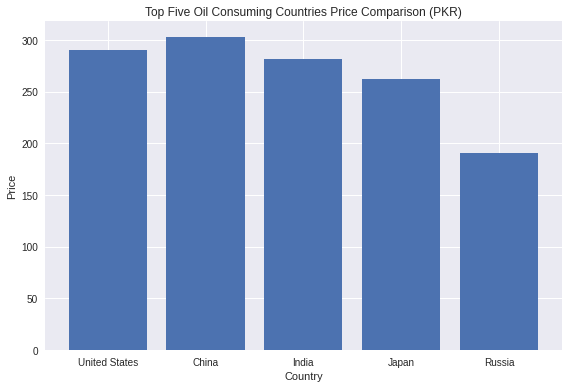

In [65]:

countries = [i for i in pgp_df['Country'].head()]
oil_price = [i for i in pgp_df['Price Per Liter (PKR)'].head()]

plt.style.use('seaborn')


fig, ax = plt.subplots()

# Create the bar chart 
ax.bar(countries, oil_price)


# Set the title and axis labels
ax.set_title('Top Five Oil Consuming Countries Price Comparison (PKR)')
ax.set_xlabel('Country')
ax.set_ylabel('Price')


plt.tight_layout()

# Display the plot
plt.show()

### *Conclusion from the visualization:*

From this visualization we can draw following conclusions;  
 
   
1. Oil producing countries have comparitively lower prices such as; USA, Russia 
depite being top oil consumers
2. China by far has the highest oil price, this could indicate that china has highest oil depedency
3. Russia being top five oil consumers still has lowest oil prices

##**Oil prices in Pakistan compared to other countries**:  
By comparing the petrol prices in Pakistan with other countries, we can see if Pakistan has higher or lower petrol prices compared to other countries by taking an average of Oil prices in other countries.

/usr/local/lib/python3.8/dist-packages/numpy/lib/stride_tricks.py:536: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  args = [np.array(_m, copy=False, subok=subok) for _m in args]


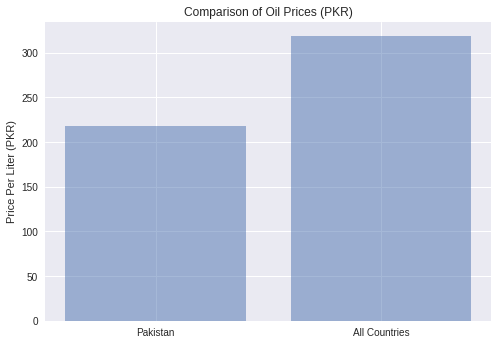

In [60]:
# dataframe that contains all entries against columns for information related to pakistan
pak = pgp_df['Country'] == 'Pakistan'
pak_df = pgp_df[pak]

# dataframe that contains average of information related to all countries other than pakistan
all = pgp_df['Country'] != 'Pakistan'
all_df = pgp_df[all]

# Petrol price in pakistan
avg_pak = pak_df['Price Per Liter (PKR)']

# average of Oil prices in countries other than pakistan
avg_all = all_df['Price Per Liter (PKR)'].mean()

plt.style.use('seaborn')

#Labels
x_labels = ['Pakistan', 'All Countries']

# Create a figure and axis object
fig, ax = plt.subplots()

# evenly spaced numbers using numpy
x_pos = np.arange(len(x_labels))

# Create a bar plot
ax.bar(x_pos, [avg_pak, avg_all], align='center', alpha=0.5)
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)

# Set the title and axis labels
ax.set_title('Comparison of Oil Prices (PKR)')
ax.set_ylabel('Price Per Liter (PKR)')

# Show the plot
plt.show()

### *Conclusion from the visualization:*

The above bar graph output shows us that oil price per liter in pakistan compared to average of all other countries is a little cheaper, Though this price is still considered high for pakistanis because of GDP, inflation and less income overall.

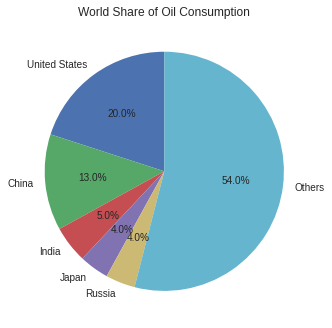

In [95]:

# Data
labels = [i for i in pgp_df['Country'].head()]
share = [i for i in pgp_df['World Share'].head()]  # World share percentages

# convert percentage list into integer
int_list = [int(s.strip('%')) for s in share]

# Adding "Others" to avoid too much values (overcrowded) of pie chart using append function
labels.append('Others')
int_list.append(100 - sum(i for i in int_list))


#Create a figure and axis object
fig, ax = plt.subplots()

# Create a pie chart
ax.pie(int_list , labels=labels, autopct='%1.1f%%', startangle=90)

# Set the title
ax.set_title('World Share of Oil Consumption')

# Show the plot
plt.show()

### *Conclusion from the visualization:*

From this pie chart we can quickly visualize that most oil consuming country is USA, followed by china and others.
___________________________________________________________________
| Countries     | World Share   |
| ------------- |:-------------:|
| United States | 20%           |
| China         | 13%           |
| India         | 5%            |
| Japan         | 4%            |
| Russia        | 4%            |

___________________________________________________________________